<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: <br>
   **Student ID**: <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [39]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display

In [40]:
df = pd.read_csv('house-prices.csv')
display(df)
df['Brick'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Neighborhood'].replace(['East', 'West', 'North', 'South'], [0, 1, 2, 3], inplace=True)
display(df)
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Brick', 'Neighborhood']].to_numpy()
y = df['Price'].to_numpy()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,0,0
1,2,114200,2030,4,2,3,0,0
2,3,114800,1740,3,2,1,0,0
3,4,94700,1980,3,2,3,0,0
4,5,119800,2130,3,3,3,0,0
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0
124,125,147900,2160,4,3,3,1,0
125,126,113500,2070,2,2,2,0,2
126,127,149900,2020,3,3,1,0,1


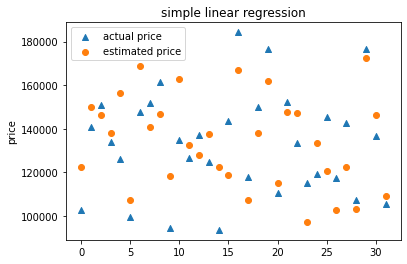

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.25)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
mean_squared_error(y_test, predictions)
plt.scatter(range(len(y_test)), y_test, marker='^', label = 'actual price')
plt.scatter(range(len(predictions)), predictions, marker='o', label = 'estimated price')
plt.legend()
plt.title('simple linear regression')
plt.ylabel('price')
plt.show()

337252629.8798995


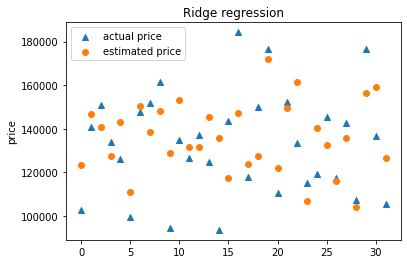

In [69]:
from sklearn.linear_model import Ridge
alpha = [0.01, 0.1, 1, 10, 100]
import math
best_mse = math.inf
best_alpha = None
for a in alpha:
    clf_rdg = Ridge(alpha = a)
    clf_rdg.fit(X_train, y_train)
    predictions_rdg = clf_rdg.predict(X_test)
    mse = mean_squared_error(y_test, predictions_rdg)
    if mse <= best_mse:
        best_alpha = a
clf_rdg = Ridge(best_alpha)
clf_rdg.fit(X_train, y_train)
predictions_rdg = clf_rdg.predict(X_test)
mse = mean_squared_error(y_test, predictions_rdg)
print(mse)
plt.scatter(range(len(y_test)), y_test, marker='^', label = 'actual price')
plt.scatter(range(len(predictions_rdg)), predictions_rdg, marker='o', label = 'estimated price')
plt.legend()
plt.title('Ridge regression')
plt.ylabel('price')
plt.show()

256873087.0502


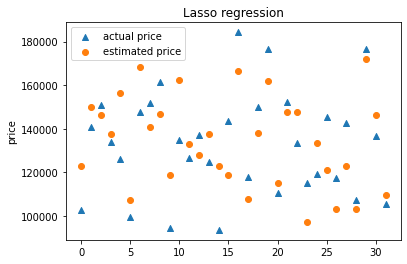

In [68]:
from sklearn import linear_model
alpha = [0.01, 0.1, 1, 10, 100]
mse = []
best_mse = math.inf
best_alpha = None
for a in alpha:
    clf_lasso = linear_model.Lasso(alpha = a)
    clf_lasso.fit(X_train, y_train)
    predictions_lasso = clf_lasso.predict(X_test)
    mse = mean_squared_error(y_test, predictions_lasso)
    if mse <= best_mse:
        best_alpha = a
clf_lasso = linear_model.Lasso(alpha = best_alpha)
clf_lasso.fit(X_train, y_train)
predictions_lasso = clf_lasso.predict(X_test)
mse = mean_squared_error(y_test, predictions_lasso)
print(mse)
plt.scatter(range(len(y_test)), y_test, marker='^', label = 'actual price')
plt.scatter(range(len(predictions_lasso)), predictions_lasso, marker='o', label = 'estimated price')
plt.legend()
plt.title('Lasso regression')
plt.ylabel('price')
plt.show()